In [10]:
import scimap as sm
import anndata as ad
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# generate anndata object
df = pd.read_csv('/Users/lukashat/Documents/PhD_Schapiro/Projects/phenotype_benchmark/datasets/cHL_2_MIBI_quantification.csv')
df

,CD45,CD20,dsDNA,pSLP-76,SLP-76,anti-H2AX (pS139),CD163,Histone H3,CD45RO,CD28,...,CD25,Na-K ATPase,cell_id,cellSize,x,y,sample_id,level_1_cell_type,level_2_cell_type,cell_type
0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.077281,0.000000,0.000000,...,0.000000,0.000000,1,13,326,2,1.csv,unedfined,undefined,undefined
1,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.167179,0.000000,0.000000,...,0.000000,0.000000,2,23,420,2,1.csv,Immune,Lymphoid_immune,CD4+_T_cell
2,0.002631,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.176009,0.000106,0.000000,...,0.000769,0.003703,4,21,1386,2,1.csv,Immune,Lymphoid_immune,CD4+_T_cell
3,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.077354,0.000000,0.000000,...,0.000000,0.000000,5,14,1436,2,1.csv,Stromal,Vascular,Endothelial
4,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.182809,0.000000,0.000000,...,0.000000,0.000000,6,24,1452,2,1.csv,unedfined,undefined,undefined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230884,0.001647,0.0,0.000260,0.000000,0.000000,0.0,0.000000,0.136305,0.009310,0.000000,...,0.004148,0.005979,40526,25,2301,2559,6.csv,Immune,Lymphoid_immune,CD4+_T_cell
230885,0.000000,0.0,0.000694,0.000000,0.000000,0.0,0.009834,0.158602,0.002389,0.000000,...,0.000000,0.004477,40527,40,2351,2559,6.csv,Immune,Lymphoid_immune,CD4+_T_cell
230886,0.000000,0.0,0.000453,0.002904,0.000779,0.0,0.003010,0.209390,0.007215,0.000000,...,0.000000,0.004282,40528,22,2371,2559,6.csv,Immune,Lymphoid_immune,CD4+_T_cell
230887,0.000000,0.0,0.000000,0.000000,0.000524,0.0,0.040630,0.227213,0.003365,0.000000,...,0.000000,0.000000,40529,16,2469,2559,6.csv,Immune,Lymphoid_immune,CD4+_T_cell


In [3]:
df.columns

Index(['CD45', 'CD20', 'dsDNA', 'pSLP-76', 'SLP-76', 'anti-H2AX (pS139)',
       'CD163', 'Histone H3', 'CD45RO', 'CD28', 'CD153 (CD30L)', 'Lag3', 'CD4',
       'CD11c', 'CD56', 'FoxP3', 'GATA3', 'Granzyme B', 'PD-L1', 'CD16',
       'Ki-67', 'PD-1', 'Pax-5', 'Tox', 'CD161', 'CD68', 'B2-Microglobulin',
       'CD8', 'CD3', 'HLA1', 'CD15', 'Tbet', 'CD14', 'CD123', 'CXCR5',
       'CD45RA', 'HLA-DR', 'CD57', 'IL-10', 'CD30', 'TIM3', 'RORgT', 'TCRgd',
       'CD86', 'CD25', 'Na-K ATPase', 'cell_id', 'cellSize', 'x', 'y',
       'sample_id', 'level_1_cell_type', 'level_2_cell_type', 'cell_type'],
      dtype='object')

In [17]:
X = df.iloc[:, :-8]
obs = df.iloc[:, -8:]
adata = ad.AnnData(
    X=X,
    obs=obs,
    var=pd.DataFrame(index=X.columns)
)
adata.X = adata.X*1000
adata.X = np.log1p(adata.X)
adata.raw = adata.copy()

/Users/lukashat/miniforge3/envs/scimap_benchmark/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning:

Transforming to str index.



In [7]:
with open('/Users/lukashat/Documents/PhD_Schapiro/Projects/phenotype_benchmark/github/pheno_benchmark_small/src/scimap_manual_annotation/cHL_2_MIBI/markers_cHL_2_MIBI.txt') as f:
    markers = f.read().splitlines()
markers

['CD4',
 'CD20',
 'PD-1',
 'FoxP3',
 'CD14',
 'CD161',
 'Tbet',
 'CD25',
 'CD68',
 'CD3',
 'CD57',
 'Pax-5',
 'GATA3',
 'TCRgd',
 'RORgT',
 'CD45RO',
 'Na-K ATPase',
 'CD56',
 'Lag3',
 'CD45RA',
 'B2-Microglobulin',
 'TIM3',
 'SLP-76',
 'Tox',
 'Histone H3',
 'CD30',
 'CXCR5',
 'Ki-67',
 'Granzyme B',
 'CD8',
 'PD-L1',
 'CD45',
 'HLA1',
 'CD153 (CD30L)',
 'pSLP-76',
 'HLA-DR',
 'CD16',
 'dsDNA',
 'CD86',
 'CD11c',
 'CD15',
 'CD28',
 'CD123',
 'anti-H2AX (pS139)',
 'CD163',
 'IL-10']

In [24]:
adata.uns['all_markers'] = markers

In [21]:
%gui qt

In [22]:
img_path = '/Users/lukashat/Documents/PhD_Schapiro/Projects/phenotype_benchmark/datasets/2_stacked.ome.tif'

In [214]:
sm.pl.napariGater(img_path, adata, imageid='sample_id',subset='2.csv', x_coordinate='x', y_coordinate='y', log=False, point_size=5)

Initializing...
Loading image data...


/var/folders/ry/jl4ll0zx1l709rh4r7_0cq6r0000gn/T/ipykernel_91597/1087878100.py:1: UserWarning:

NOTE: napariGater() is currently in beta testing. If you encounter any issues, please report them at: https://github.com/labsyspharm/scimap/issues



FileNotFoundError: [Errno 2] No such file or directory: '/Users/lukashat/Documents/PhD_Schapiro/Projects/phenotype_benchmark/datasets/2_stacked.ome.tif'

In [212]:
adata.uns['gates']

,1.csv,2.csv,3.csv,4.csv,5.csv,6.csv
CD45,0.664520,0.100000,0.571060,0.380169,0.642240,1.000694
CD20,1.420203,0.080000,0.619710,1.019579,1.182116,0.980043
dsDNA,0.692578,0.858921,1.164793,0.675053,0.883338,0.917338
pSLP-76,0.414778,0.356576,0.451143,0.362629,0.310766,0.600395
SLP-76,0.365246,0.235684,0.298067,0.349600,0.165231,0.425947
anti-H2AX (pS139),0.307701,0.658610,0.475104,0.398289,0.231111,0.324569
CD163,1.403692,3.800000,2.331821,2.300637,1.377718,2.019032
Histone H3,5.301256,5.519033,5.601696,5.341654,5.267730,5.333837
CD45RO,0.651554,1.638686,0.861205,0.743259,2.630557,1.704257
CD28,0.399829,0.510492,0.484074,0.222835,1.095127,0.662421


In [213]:
phenotype = pd.read_csv('/Users/lukashat/Documents/PhD_Schapiro/Projects/phenotype_benchmark/github/pheno_benchmark_small/src/scimap_manual_annotation/cHL_2_MIBI/decision_matrix.csv')
phenotype.style.format(na_rep='')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/lukashat/Documents/PhD_Schapiro/Projects/phenotype_benchmark/github/pheno_benchmark_small/src/scimap_manual_annotation/cHL_2_MIBI/decision_matrix.csv'

In [ ]:
adata.raw.X

In [208]:
adata = sm.tl.phenotype_cells (adata, phenotype=phenotype, label="predicted_phenotype") 

Phenotyping Cancer
Phenotyping Endothelial
Phenotyping T_cell
Phenotyping B_cell
Phenotyping NK_cell
Phenotyping Dendritic_cell
Phenotyping M1_Macrophage
Phenotyping M2_Macrophage


/Users/lukashat/miniforge3/envs/scimap_benchmark/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/lukashat/miniforge3/envs/scimap_benchmark/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Phenotyping Neutrophil
-- Subsetting T_cell
Phenotyping CD4+_T_cell
Phenotyping CD8+_T_cell
-- Subsetting CD4+_T_cell
Phenotyping Treg
Consolidating the phenotypes across all groups


/Users/lukashat/miniforge3/envs/scimap_benchmark/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [209]:
adata[adata.obs['sample_id'] == '2.csv'].obs['predicted_phenotype'].value_counts()

predicted_phenotype
M2_Macrophage     9155
Neutrophil        6858
CD4+_T_cell       5697
likely-T_cell     5354
Dendritic_cell    4217
Treg              2658
M1_Macrophage     1857
CD8+_T_cell       1786
Endothelial        719
Cancer             636
B_cell             589
NK_cell             97
Name: count, dtype: int64

In [210]:
adata[adata.obs['sample_id'] == '2.csv'].obs['cell_type'].value_counts()

cell_type
CD4+_T_cell       8993
M2_Macrophage     6464
Neutrophil        5709
CD8+_T_cell       5490
Treg              3208
Dendritic_cell    2690
undefined         2052
Cancer            1667
M1_Macrophage     1245
Endothelial        841
B_cell             814
NK_cell            450
Name: count, dtype: int64

In [61]:
adata[adata.obs['sample_id'] == '2.csv'].obs

,cell_id,cellSize,x,y,sample_id,level_1_cell_type,level_2_cell_type,cell_type,predicted_phenotype
38094,2,15,199,3,2.csv,Immune,Lymphoid_immune,CD4+_T_cell,CD4+_T_cell
38095,4,23,615,2,2.csv,Immune,Myeloid_immune,M2_Macrophage,M2_Macrophage
38096,6,23,798,2,2.csv,unedfined,undefined,undefined,Cancer
38097,9,28,993,2,2.csv,unedfined,undefined,undefined,Cancer
38098,10,16,1008,2,2.csv,Immune,Myeloid_immune,M2_Macrophage,M2_Macrophage
...,...,...,...,...,...,...,...,...,...
77712,40138,31,2524,2559,2.csv,Immune,Myeloid_immune,Dendritic_cell,CD8+_T_cell
77713,40139,15,86,2559,2.csv,Immune,Myeloid_immune,Neutrophil,Neutrophil
77714,40140,22,1185,2559,2.csv,Immune,Lymphoid_immune,CD4+_T_cell,Treg
77715,40141,16,1239,2559,2.csv,unedfined,undefined,undefined,Cancer


In [211]:
print(classification_report(adata[adata.obs['sample_id'] == '2.csv'].obs['predicted_phenotype'], adata[adata.obs['sample_id'] == '2.csv'].obs['cell_type'], zero_division=0))

                precision    recall  f1-score   support

        B_cell       0.32      0.44      0.37       589
   CD4+_T_cell       0.40      0.64      0.50      5697
   CD8+_T_cell       0.25      0.76      0.37      1786
        Cancer       0.34      0.89      0.49       636
Dendritic_cell       0.33      0.21      0.26      4217
   Endothelial       0.72      0.85      0.78       719
 M1_Macrophage       0.43      0.29      0.34      1857
 M2_Macrophage       0.52      0.37      0.43      9155
       NK_cell       0.21      0.96      0.34        97
    Neutrophil       0.83      0.69      0.75      6858
          Treg       0.46      0.56      0.51      2658
 likely-T_cell       0.00      0.00      0.00      5354
     undefined       0.00      0.00      0.00         0

      accuracy                           0.44     39623
     macro avg       0.37      0.51      0.40     39623
  weighted avg       0.44      0.44      0.42     39623



In [42]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix

In [205]:
cm = sk_confusion_matrix(
	adata[adata.obs['sample_id'] == '2.csv'].obs['cell_type'],
	adata[adata.obs['sample_id'] == '2.csv'].obs['predicted_phenotype'],
	labels=adata.obs['cell_type'].unique(),
    normalize='true'
)

<Figure size 1000x1000 with 0 Axes>

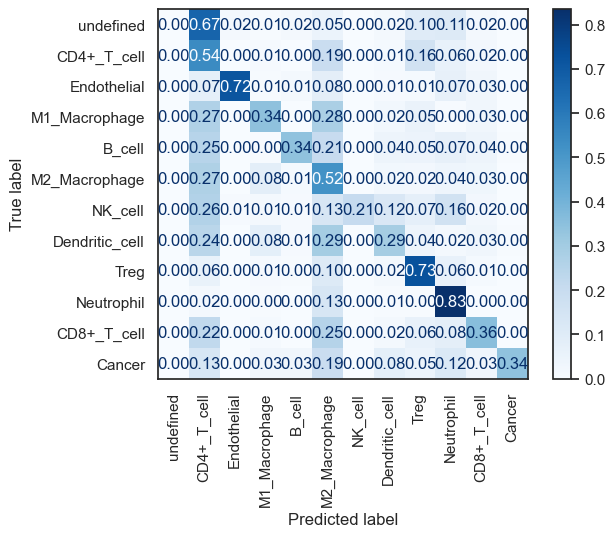

In [206]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
cmd = ConfusionMatrixDisplay(cm, display_labels=adata.obs['cell_type'].unique())
cmd.plot(cmap='Blues', values_format='.2f', xticks_rotation=90)
plt.show()

In [183]:
sm.pl.image_viewer(image_path=img_path, 
                   adata=adata, 
                   overlay='predicted_phenotype', 
                   point_size=6,
                   y_coordinate='y',
                   x_coordinate='x',
                   subset='2.csv',
                   imageid='sample_id',
                   point_color='white')

In [184]:
sm.pl.image_viewer(image_path=img_path, 
                   adata=adata, 
                   overlay='cell_type', 
                   point_size=6,
                   y_coordinate='y',
                   x_coordinate='x',
                   subset='2.csv',
                   imageid='sample_id',
                   point_color='white')